# EUROPEAN CITIES
## Capstone final project

## 1.	BUSINESS PROBLEM
The European Union (EU) is a political and economic union of 28 member states that are located primarily in Europe. It has an area of 4,475,757 km2 (1,728,099 sq mi) and an estimated population of about 513 million. The EU has developed an internal single market through a standardised system of laws that apply in all member states in those matters, and only those matters, where members have agreed to act as one.

I live in one of EU member states, but am interested to see, weather another member state can offer me better living conditions in terms of housing costs and availability of venues nearby.

Real estate prices and rents vary considerably, not just between and within EU Member States, but also at a more local/regional level. Nevertheless, housing is often the largest single item in a household budget, irrespective of whether the occupants are paying off a mortgage/loan or renting a property. 

I'd like to live in a city which offers a lot of venues for young people and is still affordable when it comes to housing prices. To figure out which city in europe offers the best ratio between price and number of venues i will use Forsquare data to get the information on nearby venues and housing price data form Eurostat (a statistical agency of the EU). I will use the data of the average price for buying an apartment in EU cities in 2017. 

I will try to analyze data (housing costs) to see the top 10 cities with the lowest prices and then compare them based on venue data. The city with the most venues would be the best match for me.

## 2.	DATA DESCRIPTION
Based on the definition of the problem, i will need:
1. List of EU cities and prices for buying an apartment or house in each city, which is available on Eurostat website (csv table downloaded from https://ec.europa.eu/eurostat/web/cities/data/database).
The data is for the year 2017. I will exclude cities that don't have pricing data (clean the table). 
I will edit/clean the data so it will contain only columns name of the city and housing price.
2. For each citiy we will need to get the list of coordinates (latitude, longitude). 
Download of a csv file with coordinates of european cities is available on: https://simplemaps.com/data/world-cities.
to the existing data i will add latitude and longitude. My data will now have columns name of the city, housing price, latitude and longitude.
3. Number of existing Venues from every category in each city, within a certain radius from the center of the city. 
With the use of Forsquare API i will get data on nearby venues for the list of european cities. 
My data will now have columns name of the city, housing price, city latitude and city longitude, Venue, Venue Category, Venue Latitude, Venue Longitude.

## 3. METHODLOGY

### Import data and clean
Cleaning and preparing the data is the first step. I downloaded the csv file containing names od european cities and average prices for buying an appartment/house and transformed it into a table. 

In [105]:
# Import libraries 
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3
!pip install ipywidgets
#import data (list of EU cities, csd file I downloaded from Eurostat and imported to IBM cloud) 
auth_endpoint = 'https://iam.bluemix.net/oidc/token'
service_endpoint = 'https://s3-api.us-geo.objectstorage.softlayer.net'

resource = ibm_boto3.resource('s3',
                   @hidden_cell   ibm_api_key_id=['l7Iq4Bcnv2TfyqN5RMzOQQguZaEASDCotZkRJ_tDA6E3'],
                 @hidden_cell     ibm_service_instance_id=['crn:v1:bluemix:public:cloud-object-storage:global:a/98036cd71b0846279c72c25fd8eefb7e:d0e12df5-b0c3-42cb-8ff2-a2215ddbb2b9::'],
                      ibm_auth_endpoint=auth_endpoint,
                      config=Config(signature_version='oauth'),
                      endpoint_url=service_endpoint)

tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.


In [106]:
# The code was removed by Watson Studio for sharing.

,TIME,CITIES,INDIC_UR,Value,Flag and Footnotes
0,2017,Bruxelles / Brussel,Average price for buying an apartment - EUR,:,NaN
1,2017,Bruxelles / Brussel,Average price for buying a house per m2 - EUR,:,NaN
2,2017,Bruxelles / Brussel,Average price for buying an apartment per m2 ...,:,NaN
3,2017,Antwerpen,Average price for buying an apartment - EUR,:,NaN
4,2017,Antwerpen,Average price for buying a house per m2 - EUR,:,NaN


In [107]:
# Drop columns time, indic_ur, Flag and Footnotes and keep only Names of european cities and their values (average prices for buying an apartment or house)
df_data_1= pd.DataFrame(df_data_1)
df_data_2=df_data_1.drop(columns=['TIME', 'INDIC_UR', 'Flag and Footnotes'])
df_data_2.head()

,CITIES,Value
0,Bruxelles / Brussel,:
1,Bruxelles / Brussel,:
2,Bruxelles / Brussel,:
3,Antwerpen,:
4,Antwerpen,:


In [108]:
# Replace missing values with nan
import numpy as np
df_data_2['Value'].replace(':', np.nan, inplace=True)
df_data_2.head()

,CITIES,Value
0,Bruxelles / Brussel,NaN
1,Bruxelles / Brussel,NaN
2,Bruxelles / Brussel,NaN
3,Antwerpen,NaN
4,Antwerpen,NaN


In [109]:
# Delete rows with missing values and keep only data for cities that have values
df_data_2.dropna(subset=['Value'],axis=0, inplace=True)
# Reset index
df_data_2.reset_index(drop=True, inplace=True)
df_data_2.head()

,CITIES,Value
0,Sofia,"24,177.00"
1,Plovdiv,"17,368.00"
2,Varna,"29,203.00"
3,Burgas,"31,324.00"
4,Pleven,"13,787.00"


In [110]:
# Get info on size of the table
df_data_2.shape

(135, 2)

In [111]:
df_data_2.describe()

,CITIES,Value
count,135,135
unique,72,130
top,Ponta Delgada,750.0
freq,3,3


In [112]:
# Change type of object for Value to Float
df_data_2['Value']=df_data_2['Value'].str.replace(',', '')
df_data_2['Value']=df_data_2['Value'].astype('Float64')
df_data_2.head()

,CITIES,Value
0,Sofia,24177.0
1,Plovdiv,17368.0
2,Varna,29203.0
3,Burgas,31324.0
4,Pleven,13787.0


Because the table contains more values for a specific city (the data contains differen prices for each city, some cities have prices for apartments and houses, some have only one value, and some have no values reported), I will calculate the average price for each city and use only one value for one city.

In [113]:
df_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 2 columns):
CITIES    135 non-null object
Value     135 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.2+ KB


In [114]:
# Group data and calculate mean for each city
cities_grouped = df_data_2.groupby('CITIES').mean()
cities_grouped.shape

(72, 1)

In [115]:
cities_grouped=pd.DataFrame(cities_grouped)
cities_grouped.reset_index(level=['CITIES'], inplace=True)
cities_grouped.head()

,CITIES,Value
0,Aveiro,33594.666667
1,Banská Bystrica,1084.900000
2,Blagoevgrad,19253.000000
3,Braga,25824.333333
4,Bratislava,1755.950000


In [116]:
# Rename column
cities_grouped.rename({'CITIES':'European City'}, axis=1, inplace=True)
cities_grouped.head()

,European City,Value
0,Aveiro,33594.666667
1,Banská Bystrica,1084.900000
2,Blagoevgrad,19253.000000
3,Braga,25824.333333
4,Bratislava,1755.950000


In [117]:
cities_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
European City    72 non-null object
Value            72 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.2+ KB


### Import data (latitude and longitude)
Now i have to import data for latitude and longitude of each city in cities_grouped. I downloaded a csv file including the coordinates for european cities and imported it into IBM Cloud storage.

In [118]:
@hidden_cell body = client_d0e12df5b0c342cb8ff2a2215ddbb2b9.get_object(Bucket='courseracapstoneproject-donotdelete-pr-wqkstnyabw0q1f',Key='worldcities.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_5 = pd.read_csv(body)
df_data_5.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Malishevë,Malisheve,42.4822,20.7458,Kosovo,XK,XKS,Malishevë,admin,NaN,1901597212
1,Prizren,Prizren,42.2139,20.7397,Kosovo,XK,XKS,Prizren,admin,NaN,1901360309
2,Zubin Potok,Zubin Potok,42.9144,20.6897,Kosovo,XK,XKS,Zubin Potok,admin,NaN,1901608808
3,Kamenicë,Kamenice,42.5781,21.5803,Kosovo,XK,XKS,Kamenicë,admin,NaN,1901851592
4,Viti,Viti,42.3214,21.3583,Kosovo,XK,XKS,Viti,admin,NaN,1901328795


Now I have to clean the data by selecting only data I need (city, lat, lng).

In [119]:
df_data_5= pd.DataFrame(df_data_5)
df_data_6=df_data_5.loc[:, ["city", "lat", "lng"]]
df_data_6.head()

,city,lat,lng
0,Malishevë,42.4822,20.7458
1,Prizren,42.2139,20.7397
2,Zubin Potok,42.9144,20.6897
3,Kamenicë,42.5781,21.5803
4,Viti,42.3214,21.3583


I will rename the column City, to match the name of the column in the dataframe cities_grouped. This will help me merge the two dataframes later on.

In [120]:
df_data_6.rename({'city':'European City'}, axis=1, inplace=True)
df_data_6.head()

,European City,lat,lng
0,Malishevë,42.4822,20.7458
1,Prizren,42.2139,20.7397
2,Zubin Potok,42.9144,20.6897
3,Kamenicë,42.5781,21.5803
4,Viti,42.3214,21.3583


In [121]:
df_data_6.shape

(12959, 3)

Now I will merge the two dataframes (cities_grouped and df_data_6) to get a new dataframe containing cites_merged all the data I need (name of the city, value of housing, latitude and longitude of the city).

In [122]:
cities_merged=cities_grouped.merge(df_data_6, on='European City')
cities_merged.head()

,European City,Value,lat,lng
0,Aveiro,33594.666667,40.6410,-8.6510
1,Banská Bystrica,1084.900000,48.7333,19.1500
2,Blagoevgrad,19253.000000,42.0167,23.1000
3,Braga,25824.333333,41.5550,-8.4213
4,Bratislava,1755.950000,48.1500,17.1170


In [123]:
cities_merged

,European City,Value,lat,lng
0,Aveiro,33594.666667,40.6410,-8.6510
1,Banská Bystrica,1084.900000,48.7333,19.1500
2,Blagoevgrad,19253.000000,42.0167,23.1000
3,Braga,25824.333333,41.5550,-8.4213
4,Bratislava,1755.950000,48.1500,17.1170
5,Budapest,785.000000,47.5000,19.0833
6,Burgas,31324.000000,42.5146,27.4746
7,Békéscsaba,379.000000,46.6720,21.1010
8,Coimbra,39013.000000,40.2004,-8.4167
9,Debrecen,675.000000,47.5305,21.6300


In [124]:
cities_merged.drop_duplicates(['European City'], inplace=True)
cities_merged.shape

(58, 4)

In [125]:
cities_merged['European City'].unique()

array(['Aveiro', 'Banská Bystrica', 'Blagoevgrad', 'Braga', 'Bratislava',
       'Budapest', 'Burgas', 'Békéscsaba', 'Coimbra', 'Debrecen',
       'Dobrich', 'Dunaújváros', 'Eger', 'Faro', 'Funchal', 'Jelgava',
       'Kaposvár', 'Kaunas', 'Kecskemét', 'Ljubljana', 'Maribor',
       'Miskolc', 'Nitra', 'Nyíregyháza', 'Osijek', 'Pazardzhik', 'Pleven',
       'Plovdiv', 'Ponta Delgada', 'Porto', 'Pécs', 'Riga', 'Rijeka',
       'Ruse', 'Shumen', 'Slavonski Brod', 'Sliven', 'Sofia', 'Sopron',
       'Split', 'Stara Zagora', 'Szeged', 'Szolnok', 'Szombathely',
       'Székesfehérvár', 'Tallinn', 'Tartu', 'Tatabánya', 'Trnava',
       'Varna', 'Veszprém', 'Vidin', 'Vilnius', 'Viseu', 'Vratsa',
       'Yambol', 'Zadar', 'Zalaegerszeg'], dtype=object)

### Import Foresquare data
now lets use forsquare to get nearby venues for these 60 european cities in data frame  cities_merged

In [126]:
@hidden_cell CLIENT_ID = 'BUNOW5XLSZ2VMWASNKEHYYNLYPKAEEJ1G1QO05CJ34WN0JK4' # your Foursquare ID
@hidden_cell CLIENT_SECRET = 'VTKQXRIOXCQV5OSTWBRZB1B5BDLWLRLCDB3OVQE2UAGMTECJ' # your Foursquare Secret
VERSION = '20190521' # Foursquare API version
LIMIT=100

def getNearbyVenues(names, latitudes, longitudes, radius=1500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng,      
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['location']['distance'],
            v['reasons']['items'][0]['summary'],
            v['venue']['categories'][0]['name']) for v in results])
        
   
        
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['European City', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude',
                  'Venue Distance',
                   'Venue Summary',
                  'Venue Category']
    return(nearby_venues)

Lets write the code to run the above function on each european city and create a new dataframe called european_venues,to get 100 venues that are in the 1500 radius of European Cities.

In [127]:
import requests
european_venues = getNearbyVenues(names=cities_merged['European City'],
                                   latitudes=cities_merged['lat'],
                                   longitudes=cities_merged['lng']
                                  )

Aveiro
Banská Bystrica
Blagoevgrad
Braga
Bratislava
Budapest
Burgas
Békéscsaba
Coimbra
Debrecen
Dobrich
Dunaújváros
Eger
Faro
Funchal
Jelgava
Kaposvár
Kaunas
Kecskemét
Ljubljana
Maribor
Miskolc
Nitra
Nyíregyháza
Osijek
Pazardzhik
Pleven
Plovdiv
Ponta Delgada
Porto
Pécs
Riga
Rijeka
Ruse
Shumen
Slavonski Brod
Sliven
Sofia
Sopron
Split
Stara Zagora
Szeged
Szolnok
Szombathely
Székesfehérvár
Tallinn
Tartu
Tatabánya
Trnava
Varna
Veszprém
Vidin
Vilnius
Viseu
Vratsa
Yambol
Zadar
Zalaegerszeg


In [128]:
print(european_venues.shape)
european_venues = pd.DataFrame(european_venues)
european_venues.head()

(3742, 9)


,European City,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Distance,Venue Summary,Venue Category
0,Aveiro,40.641,-8.651,Confeitaria Peixinho,40.640973,-8.653749,232,This spot is popular,Dessert Shop
1,Aveiro,40.641,-8.651,Museu da Cidade de Aveiro,40.639714,-8.651704,155,This spot is popular,Art Gallery
2,Aveiro,40.641,-8.651,Bertrand,40.641005,-8.651597,50,This spot is popular,Bookstore
3,Aveiro,40.641,-8.651,Teatro Aveirense,40.639959,-8.654104,286,This spot is popular,Theater
4,Aveiro,40.641,-8.651,Subenshi,40.640473,-8.647083,336,This spot is popular,Japanese Restaurant


Saving a cleaned version of DataFrame with the Results from Foursquare

In [129]:
#Let's check how many venues were returned for each city
european_venues=european_venues.groupby('European City').count().reset_index()

In [130]:
# add a column containing count value
print(european_venues.shape)

(57, 9)


##### Because there is no Forsquare data on Eger, data frame european_venues includes only 57 European cities, where the original data cities_merged contain data (name, lat, lng, value) for 58 unique cities.
that is why i will have to remove Eger form my original data frame later on, otherwise i can't cluster data based on vendor information.

In [131]:
!pip install folium

tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.


In [132]:
# Import libraries for data vizualization
import folium
import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

In [160]:
# location of central europe
latitude=48.499998 
longitude=23.3833318
# Lets plot Europe on the map, which we will use later on to show clusters
european_venues_map = folium.Map(location=[latitude, longitude], zoom_start=4)
european_venues_map

## Clustering

### K- means
Now lets cluster cities with k-means on vendor data.
Let's analyze each city.

In [134]:
european_venues.head()

,European City,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Distance,Venue Summary,Venue Category
0,Aveiro,97,97,97,97,97,97,97,97
1,Banská Bystrica,84,84,84,84,84,84,84,84
2,Blagoevgrad,65,65,65,65,65,65,65,65
3,Braga,100,100,100,100,100,100,100,100
4,Bratislava,100,100,100,100,100,100,100,100


In [135]:
# one hot encoding
european_venues_onehot = pd.get_dummies(european_venues[['Venue Category']], prefix="", prefix_sep="")

# add city column back to dataframe
european_venues_onehot['European City'] = european_venues['European City'] 

# move city column to the first column
fixed_columns = [european_venues_onehot.columns[-1]] + list(european_venues_onehot.columns[:-1])
european_venues_onehot = european_venues_onehot[fixed_columns]

european_venues_onehot.head()

,European City,Venue Category
0,Aveiro,97
1,Banská Bystrica,84
2,Blagoevgrad,65
3,Braga,100
4,Bratislava,100


Next, let's group rows by European city and by taking the number (count) of occurrence of each category.

In [136]:
european_venues_o_g = european_venues_onehot.groupby('European City').median().reset_index()
european_venues_o_g

,European City,Venue Category
0,Aveiro,97
1,Banská Bystrica,84
2,Blagoevgrad,65
3,Braga,100
4,Bratislava,100
5,Budapest,100
6,Burgas,60
7,Békéscsaba,41
8,Coimbra,100
9,Debrecen,100


##### Run k-means to cluster the cities into 4 clusters. I choose 4 clusters, to compare the results with quartiles.

In [137]:
# import k-means from clustering stage
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

In [138]:
# set number of clusters
kclusters = 4

european_venues_o_g_clustering = european_venues_o_g.drop('European City', 1)
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=1).fit(european_venues_o_g_clustering)

# check cluster labels generated for each row in the dataframe
print(kmeans.labels_[0:10])
print(len(kmeans.labels_))

[0 0 2 0 0 0 2 1 0 0]
57


In [139]:
cities_merged.head()

,European City,Value,lat,lng
0,Aveiro,33594.666667,40.6410,-8.6510
1,Banská Bystrica,1084.900000,48.7333,19.1500
2,Blagoevgrad,19253.000000,42.0167,23.1000
3,Braga,25824.333333,41.5550,-8.4213
4,Bratislava,1755.950000,48.1500,17.1170


In [140]:
cities_merged.drop(index=12, inplace=True)

In [141]:
cities_merged.shape

(57, 4)

In [142]:
europe_merged = cities_merged

# add clustering labels
europe_merged['Cluster Labels'] = kmeans.labels_

europe_merged = europe_merged.join(european_venues_o_g.set_index('European City'), on='European City')

europe_merged.head() # check the last columns!

,European City,Value,lat,lng,Cluster Labels,Venue Category
0,Aveiro,33594.666667,40.6410,-8.6510,0,97
1,Banská Bystrica,1084.900000,48.7333,19.1500,0,84
2,Blagoevgrad,19253.000000,42.0167,23.1000,2,65
3,Braga,25824.333333,41.5550,-8.4213,0,100
4,Bratislava,1755.950000,48.1500,17.1170,0,100


### Visualize the clusters

In [143]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=4)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(europe_merged['lat'], europe_merged['lng'], europe_merged['European City'],kmeans.labels_):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## 4. RESULTS

In [144]:
# Cluster 0 (red)
print('Average price for buying an apartment for Cluster 0 (RED) is', europe_merged.loc[europe_merged['Cluster Labels'] == 0]['Value'].mean())
print('City with lowest price in Cluster 0 is', europe_merged['European City'].loc[europe_merged.loc[europe_merged['Cluster Labels'] == 0]['Value'].idxmin()], 'with a price of', europe_merged['Value'].loc[europe_merged.loc[europe_merged['Cluster Labels'] == 0]['Value'].idxmin()])
print('Average number of venues per city is', europe_merged.loc[europe_merged['Cluster Labels'] == 0]['Venue Category'].mean(), 'in the cluster.')

Average price for buying an apartment for Cluster 0 (RED) is 21028.53541666667
City with lowest price in Cluster 0 is Pécs with a price of 502.5
Average number of venues per city is 96.08333333333333 in the cluster.


In [145]:
# Cluster 1 (purple)
print('Average price for buying an apartment for Cluster 1 (PURPLE)  is', europe_merged.loc[europe_merged['Cluster Labels'] == 1]['Value'].mean())
print('City with lowest price in Cluster 1 is', europe_merged['European City'].loc[europe_merged.loc[europe_merged['Cluster Labels'] == 1]['Value'].idxmin()], 'with a price of', europe_merged['Value'].loc[europe_merged.loc[europe_merged['Cluster Labels'] == 1]['Value'].idxmin()])
print('Average number of venues per city is', europe_merged.loc[europe_merged['Cluster Labels'] == 1]['Venue Category'].mean(), 'in the cluster.')

Average price for buying an apartment for Cluster 1 (PURPLE)  is 25866.395555555555
City with lowest price in Cluster 1 is Békéscsaba with a price of 379.0
Average number of venues per city is 38.44444444444444 in the cluster.


In [146]:
# Cluster 2 (blue)
print('Average price for buying an apartment for Cluster 2 (BLUE) is', europe_merged.loc[europe_merged['Cluster Labels'] == 2]['Value'].mean())
print('City with lowest price in Cluster 2 is', europe_merged['European City'].loc[europe_merged.loc[europe_merged['Cluster Labels'] == 2]['Value'].idxmin()], 'with a price of', europe_merged['Value'].loc[europe_merged.loc[europe_merged['Cluster Labels'] == 2]['Value'].idxmin()])
print('Average number of venues per city is', europe_merged.loc[europe_merged['Cluster Labels'] == 2]['Venue Category'].mean(), 'in the cluster.')

Average price for buying an apartment for Cluster 2 (BLUE) is 16144.882142857143
City with lowest price in Cluster 2 is Miskolc with a price of 373.0
Average number of venues per city is 65.78571428571429 in the cluster.


In [147]:
# Cluster 3 (green)
print('Average price for buying an apartment 3 (GREEN) is', europe_merged.loc[europe_merged['Cluster Labels'] == 3]['Value'].mean())
print('City with lowest price in Cluster 3 is', europe_merged['European City'].loc[europe_merged.loc[europe_merged['Cluster Labels'] == 3]['Value'].idxmin()], 'with a price of', europe_merged['Value'].loc[europe_merged.loc[europe_merged['Cluster Labels'] == 3]['Value'].idxmin()])
print('Average number of venues per city is', europe_merged.loc[europe_merged['Cluster Labels'] == 3]['Venue Category'].mean(), 'in the cluster.')

Average price for buying an apartment 3 (GREEN) is 26554.283000000003
City with lowest price in Cluster 3 is Szolnok with a price of 379.5
Average number of venues per city is 16.9 in the cluster.


In [148]:
# Cities in cluster 0
europe_merged.loc[europe_merged['Cluster Labels'] == 0, europe_merged.columns[[0] + list(range(5, europe_merged.shape[1]))]]

,European City,Venue Category
0,Aveiro,97
1,Banská Bystrica,84
3,Braga,100
4,Bratislava,100
5,Budapest,100
8,Coimbra,100
9,Debrecen,100
20,Ljubljana,100
23,Nitra,85
28,Plovdiv,100


In [149]:
# Cities in cluster 1
europe_merged.loc[europe_merged['Cluster Labels'] == 1, europe_merged.columns[[0] + list(range(5, europe_merged.shape[1]))]]

,European City,Venue Category
7,Békéscsaba,41
17,Kaposvár,39
26,Pazardzhik,37
27,Pleven,37
37,Sliven,49
40,Split,34
53,Vilnius,31
56,Vratsa,28
59,Zalaegerszeg,50


In [150]:
# Cities in cluster 2
europe_merged.loc[europe_merged['Cluster Labels'] == 2, europe_merged.columns[[0] + list(range(5, europe_merged.shape[1]))]]

,European City,Venue Category
2,Blagoevgrad,65
6,Burgas,60
14,Faro,64
16,Jelgava,67
19,Kecskemét,69
21,Maribor,54
22,Miskolc,60
24,Nyíregyháza,69
25,Osijek,56
39,Sopron,76


In [151]:
# Cities in cluster 3
europe_merged.loc[europe_merged['Cluster Labels'] == 3, europe_merged.columns[[0] + list(range(5, europe_merged.shape[1]))]]

,European City,Venue Category
10,Dobrich,5
11,Dunaújváros,16
15,Funchal,14
18,Kaunas,26
36,Slavonski Brod,21
43,Szolnok,15
48,Tatabánya,6
52,Vidin,21
57,Yambol,26
58,Zadar,19


Lets see which are the cheapest 20 cities to live in based on average price for buying an appartment.

In [152]:
# Top 20 cities with the lowest averaga price for buying an apartment/house
cheapest=cities_grouped.sort_values(by=['Value']).head(20)
cheapest

,European City,Value
27,Miskolc,373.00
7,Békéscsaba,379.00
52,Szolnok,379.50
11,Dunaújváros,397.00
20,Kaposvár,411.50
70,Zalaegerszeg,455.50
39,Pécs,502.50
29,Nyíregyháza,508.50
12,Eger,522.50
57,Tatabánya,524.00


In [153]:
# Top 20 cities with most venues
most_venues=european_venues_o_g.sort_values(by=['Venue Category'], ascending=False).head(20)
most_venues

,European City,Venue Category
28,Porto,100
18,Ljubljana,100
48,Varna,100
3,Braga,100
4,Bratislava,100
5,Budapest,100
45,Tartu,100
44,Tallinn,100
8,Coimbra,100
9,Debrecen,100


In [154]:
# Top 20 cheapest cities with venue data and cluster label
cheapest2=cheapest.merge(europe_merged, on='European City')
cheapest2

,European City,Value_x,Value_y,lat,lng,Cluster Labels,Venue Category
0,Miskolc,373.0,373.0,48.1004,20.7800,2,60
1,Békéscsaba,379.0,379.0,46.6720,21.1010,1,41
2,Szolnok,379.5,379.5,47.1864,20.1794,3,15
3,Dunaújváros,397.0,397.0,46.9807,18.9327,3,16
4,Kaposvár,411.5,411.5,46.3670,17.8000,1,39
5,Zalaegerszeg,455.5,455.5,46.8440,16.8400,1,50
6,Pécs,502.5,502.5,46.0804,18.2200,0,100
7,Nyíregyháza,508.5,508.5,47.9653,21.7187,2,69
8,Tatabánya,524.0,524.0,47.5500,18.4330,3,6
9,Szeged,570.0,570.0,46.2504,20.1500,0,100


##### We can see that the cheapest cities for buying an apartment/house are mostly in Cluster 2, where the average price is the lowes between clusters. But when we look at the list of top 20 cheapest cities, we can se they are in every cluster.

In [155]:
# Top 20 cities with most venues, added venue data 
most_venues2=most_venues.merge(europe_merged, on='European City')
most_venues2

,European City,Venue Category_x,Value,lat,lng,Cluster Labels,Venue Category_y
0,Porto,100,53491.500000,41.1500,-8.6200,0,100
1,Ljubljana,100,43276.333333,46.0553,14.5150,0,100
2,Varna,100,29203.000000,43.2156,27.8953,0,100
3,Braga,100,25824.333333,41.5550,-8.4213,0,100
4,Bratislava,100,1755.950000,48.1500,17.1170,0,100
5,Budapest,100,785.000000,47.5000,19.0833,0,100
6,Tartu,100,22405.666667,58.3839,26.7099,0,100
7,Tallinn,100,26225.666667,59.4339,24.7280,0,100
8,Coimbra,100,39013.000000,40.2004,-8.4167,0,100
9,Debrecen,100,675.000000,47.5305,21.6300,0,100


In [156]:
# Cluster labesl of Top 20 cities with most venues 
most_venues3=most_venues2[['European City', 'Cluster Labels']]
most_venues3

,European City,Cluster Labels
0,Porto,0
1,Ljubljana,0
2,Varna,0
3,Braga,0
4,Bratislava,0
5,Budapest,0
6,Tartu,0
7,Tallinn,0
8,Coimbra,0
9,Debrecen,0


##### The cities with most venues are in Cluster 0.

The best choice for me would be to choose a city that is among those in the table "cheapest2" which has the lowest average prices for buying an apartment/house and is in cluster 0 (has most venues).

In [157]:
optimum=most_venues2.merge(cheapest2, on='European City')
optimum

,European City,Venue Category_x,Value,lat_x,lng_x,Cluster Labels_x,Venue Category_y,Value_x,Value_y,lat_y,lng_y,Cluster Labels_y,Venue Category
0,Budapest,100,785.0,47.5000,19.0833,0,100,785.0,785.0,47.5000,19.0833,0,100
1,Debrecen,100,675.0,47.5305,21.6300,0,100,675.0,675.0,47.5305,21.6300,0,100
2,Szeged,100,570.0,46.2504,20.1500,0,100,570.0,570.0,46.2504,20.1500,0,100
3,Pécs,100,502.5,46.0804,18.2200,0,100,502.5,502.5,46.0804,18.2200,0,100
4,Szombathely,91,634.5,47.2253,16.6287,0,91,634.5,634.5,47.2253,16.6287,0,91


## RESULTS
The cities with most venues and low average apartment/house prices are:
- Budapest (Hungary)
- Debrecen(Hungary)
- Szeged (Hungary)
- Pecs (Hungary)
- Szombathely (Hungary)

Text(0.5,1,'City price and venues')

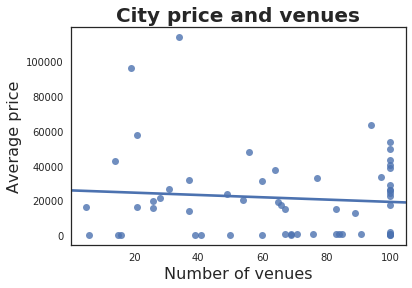

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')
sns.regplot(data=europe_merged, x="Venue Category", y="Value", ci = None)
plt.xlabel('Number of venues', size = 16)
plt.ylabel('Average price', size = 16)
plt.title("City price and venues", size = 20, weight = 'bold')

We can see that average prices for buying an apartment/house has week correlation with number of venues. 

In [159]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(europe_merged['Venue Category'], europe_merged['Value'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.0872844373675  with a P-value of P = 0.518527106929


Since the p-value is $>$ 0.1 (no certanty in the result), the correlation between numebr of venues and housing price is statistically significant, and the linear relationship is close to zero (-0.0872) it has no realtionship. 